In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
def f(x, y):
    return y - x

In [17]:
def runge_kutta(f, x0, y0, h):
    k1 = f(x0, y0)
    k2 = f(x0 + h / 2, y0 + k1 * h / 2)
    k3 = f(x0 + h / 4, y0 + k2 * h / 4)

    return y0 + h * (2 * k1 + 3 * k2 + 4 * k3) / 9

In [18]:
h = 0.001
x0 = 0
y0 = 0

In [19]:
eps = 0.001

In [20]:
X, Y = [], []
e = eps + 1

while x0 <= 1:
    x1 = x0
    
    X.append(x0)
    Y.append(y0)

    # Пересчет
    y0 = runge_kutta(f, x0, y0, h)
    x0 += h

    y1 = y0
    n = 2
    while e < eps:
        for _ in range(n):
            y1 = runge_kutta(f, x1 + _ * h / n, y1)
        
        e = np.abs(y1 - y0)
        y1 = y0
        n *= 2

    y0 = y1

In [21]:
X = np.array(X)

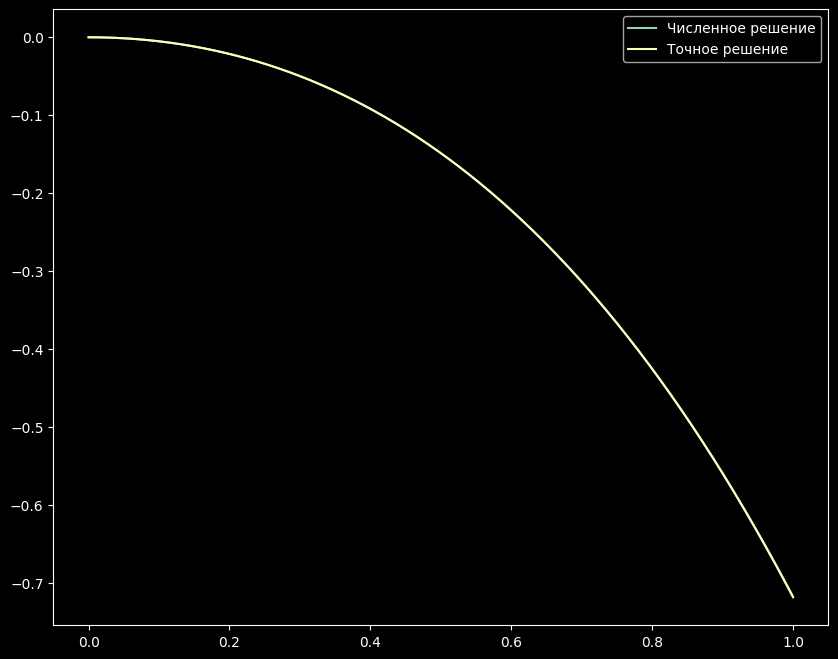

In [22]:
plt.figure(figsize=(10, 8))

X_ = np.linspace(0, 1, 1000)

plt.plot(X, Y, label='Численное решение')
plt.plot(X_, X_ + 1 - np.exp(X_), label='Точное решение')

plt.legend()

plt.show()